In [59]:
# Konu: Mamografik Kitle Verileri Analizi İle Meme Kanseri Teşhisi (İyi huylu veya kötü huylu)

In [ ]:
# Çalışmayı Hazırlayan:
#Ayse Aydoğdu
#17010011008

In [ ]:
# Bu çalışma Neden Önemli ?

#Meme kanseri kadınlarda görülen kanserler arasında en yaygın olan ve akciğer kanserinden sonra en sık ölüm nedeni olan
#kanserdir.Tüm kadın kanserlerinin %24 ünü ve kanserden ölümleri %14 ünü oluşturmaktadır.
#Dünyada her yıl 2 milyon kadın, ülkemizde ise 20 bin kadın meme kanserinden etkilenmektedir.
#Her 8 kadından birinin hayatının belirli bir zamanında meme kanserine yakalanacağı bildirilmektedir.Nadir olarak erkeklerde 
#de meme kanseri görülmektedir.Meme kanseri görülme sıklığının her yıl arttığı saptanmıştır.
#Tüm kanser türlerinde olduğu gibi göğüs kanserinde de erken teşhis ve tedavi oldukça büyük önem taşımaktadır.

#Kaynak:https://www.medicalpark.com.tr/meme-kanseri/hg-1869

In [ ]:
#Bu veri analiz projesini hangi amaçla gerçekleştiriyoruz?

#Mamografi günümüzde meme kanseri taraması için en etkili yöntemdir . Bununla birlikte,mamogram yorumundan kaynaklanan meme
#biyopsisinin düşük pozitif prediktif değeri,yaklaşık %70 gereksiz biyopsilere yol açmaktadır . Çoksayıda gereksiz meme 
#biyopsisini azaltmak için önerilmiştir.Bu sistem,doktorlara mamogramda görülen şüpheli bir lezyon üzerinde meme biyopsisi 
#yapma veya biyopsi yapmama kararlarında yardımcı olabilmektedir.
#Bu veri seti iyi veya kötü huylu kanserleri tahmin etmek için kullanılabilir.





In [ ]:
#Veri Seti Adresi:
#http://archive.ics.uci.edu/ml/datasets/mammographic+mass

In [ ]:
#Veri Seti:
#Örnek sayısı:961
#Öznitelik sayısı:6
#Öznitelikler:
  # 1. BI-RADS değerlendirmesi: 1 ila 5 (sıralı)
  # 2. Yaş: hastanın yıl cinsinden yaşı (tam sayı)
  # 3. Şekil: kütle şekli: yuvarlak=1 oval=2 lobüler=3 düzensiz=4 (nominal)
  # 4. Marj: kütle marjı: sınırlı=1 mikrolobule=2 belirsiz=3 tam tanımsız=4 sivri uçlu=5 (nominal)
  # 5. Yoğunluk: kütle yoğunluğu yüksek=1 iso=2 düşük=3 yağ içeren=4 (sıralı)
  # 6. Şiddet: iyi huylu=0 veya kötü huylu=1 (binominal)
#Sınıf Dağılımı: iyi huylu: 516; kötü huylu: 445



In [ ]:
# Kullanılan Algoritmalar: Knn,Decision Tree ,Naive Bayes

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns

In [4]:
#Veri seti yukarıda verilen adresten indirilmiştir ve en üstüne öznitelik isimleri eklenip tekrar kaydedilmiştir

In [5]:
df=pd.read_csv("VA_17_008VeriSeti.data")  #veri seti yükleme

In [6]:
df

,BI-RADS assessment,Age,Shape,Margin,Density,Severity
0,5,67,3,5,3,1
1,4,43,1,1,?,1
2,5,58,4,5,3,1
3,4,28,1,1,3,0
4,5,74,1,5,?,1
...,...,...,...,...,...,...
956,4,47,2,1,3,0
957,4,56,4,5,3,1
958,4,64,4,5,3,0
959,5,66,4,5,3,1


In [7]:
#Eksik veri tespiti

In [8]:
df.isnull().sum() 

BI-RADS assessment    0
Age                   0
Shape                 0
Margin                0
Density               0
Severity              0
dtype: int64

In [9]:
# Veri setinde boş değerler ? ile ifade edilmiş ve bu yüzden boş veri yokmuş gibi gözüküyor
# Bu nedenle ? olan yerleri sileceğiz ve tekrar başka bir dosya olarak kaydedeceğiz.

In [10]:
df.replace({'?':""},inplace=True) # "?" olan yerlere boşluk karakteri ekliyoruz

In [11]:
df

,BI-RADS assessment,Age,Shape,Margin,Density,Severity
0,5,67,3,5,3,1
1,4,43,1,1,,1
2,5,58,4,5,3,1
3,4,28,1,1,3,0
4,5,74,1,5,,1
...,...,...,...,...,...,...
956,4,47,2,1,3,0
957,4,56,4,5,3,1
958,4,64,4,5,3,0
959,5,66,4,5,3,1


In [12]:
df.to_csv("data.csv")  # Düzenlenmiş veri setini data.csv olarak kaydediyoruz

In [13]:
df=pd.read_csv("data.csv") # Yeni veri setini yüklüyoruz

In [14]:
df

,Unnamed: 0,BI-RADS assessment,Age,Shape,Margin,Density,Severity
0,0,5.0,67.0,3.0,5.0,3.0,1
1,1,4.0,43.0,1.0,1.0,NaN,1
2,2,5.0,58.0,4.0,5.0,3.0,1
3,3,4.0,28.0,1.0,1.0,3.0,0
4,4,5.0,74.0,1.0,5.0,NaN,1
...,...,...,...,...,...,...,...
956,956,4.0,47.0,2.0,1.0,3.0,0
957,957,4.0,56.0,4.0,5.0,3.0,1
958,958,4.0,64.0,4.0,5.0,3.0,0
959,959,5.0,66.0,4.0,5.0,3.0,1


In [15]:
df.describe()

,Unnamed: 0,BI-RADS assessment,Age,Shape,Margin,Density,Severity
count,961.000000,959.000000,956.000000,930.000000,913.000000,885.000000,961.000000
mean,480.000000,4.348279,55.487448,2.721505,2.796276,2.910734,0.463059
std,277.561104,1.783031,14.480131,1.242792,1.566546,0.380444,0.498893
min,0.000000,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,240.000000,4.000000,45.000000,2.000000,1.000000,3.000000,0.000000
50%,480.000000,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,720.000000,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,960.000000,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          961 non-null    int64  
 1   BI-RADS assessment  959 non-null    float64
 2   Age                 956 non-null    float64
 3   Shape               930 non-null    float64
 4   Margin              913 non-null    float64
 5   Density             885 non-null    float64
 6   Severity            961 non-null    int64  
dtypes: float64(5), int64(2)
memory usage: 52.7 KB


In [17]:
df.isnull()

,Unnamed: 0,BI-RADS assessment,Age,Shape,Margin,Density,Severity
0,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...
956,False,False,False,False,False,False,False
957,False,False,False,False,False,False,False
958,False,False,False,False,False,False,False
959,False,False,False,False,False,False,False


In [18]:
df.isnull().sum()

Unnamed: 0             0
BI-RADS assessment     2
Age                    5
Shape                 31
Margin                48
Density               76
Severity               0
dtype: int64

In [19]:
import seaborn as sns

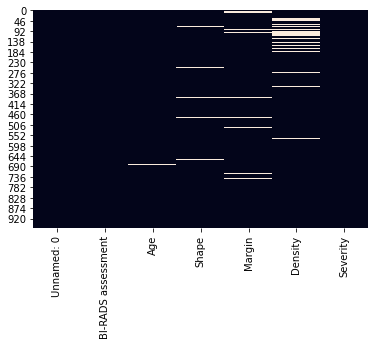

In [20]:
sns.heatmap(df.isnull(), cbar = False);

In [21]:
# Eksik veriler ortalamalar ile dolduruldu

In [22]:
df["BI-RADS assessment"].fillna(df["BI-RADS assessment"].mean(),inplace=True)

In [23]:
df["Age"].fillna(df["Age"].mean(),inplace=True)

In [24]:
df["Shape"].fillna(df["Shape"].mean(),inplace=True)

In [25]:
df["Density"].fillna(df["Density"].mean(),inplace=True)

In [26]:
df["Margin"].fillna(df["Margin"].mean(),inplace=True)

In [27]:
df.isnull().sum()

Unnamed: 0            0
BI-RADS assessment    0
Age                   0
Shape                 0
Margin                0
Density               0
Severity              0
dtype: int64

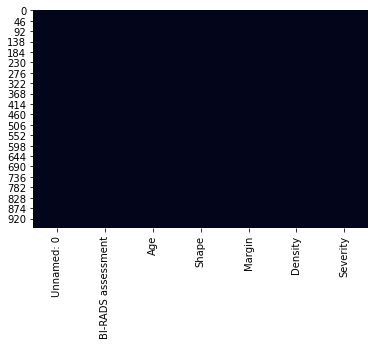

In [28]:
sns.heatmap(df.isnull(), cbar = False);

In [29]:
df.describe()

,Unnamed: 0,BI-RADS assessment,Age,Shape,Margin,Density,Severity
count,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000
mean,480.000000,4.348279,55.487448,2.721505,2.796276,2.910734,0.463059
std,277.561104,1.781173,14.442373,1.222561,1.526880,0.365074,0.498893
min,0.000000,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,240.000000,4.000000,45.000000,2.000000,1.000000,3.000000,0.000000
50%,480.000000,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,720.000000,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,960.000000,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


In [30]:
#aykırı veri tespiti

In [31]:
!pip install missingno

In [32]:
import missingno as msno

<AxesSubplot:>

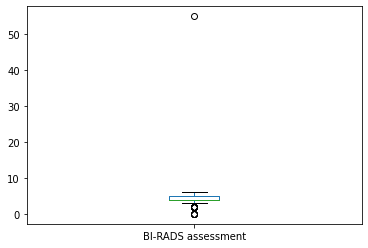

In [33]:
df['BI-RADS assessment'].plot(kind='box') # BI-RADS assessment özelliğinde aykırı veri kontrolü

In [34]:
# BI-RADS assessment özelliğinde aykırı veri olduğu görülmektedir. Aykırı verileri IQR yöntemi ile tespit edelim.

In [35]:
Q1=df["BI-RADS assessment"].quantile(0.25)

In [36]:
Q1

4.0

In [37]:
Q3=df["BI-RADS assessment"].quantile(0.75)

In [38]:
Q3

5.0

In [39]:
iqr=Q3-Q1

In [40]:
alt_sinir=Q1-iqr*1.5

In [41]:
ust_sinir=Q3+iqr*1.5                      

In [42]:
outlier_alt=(df["BI-RADS assessment"]<alt_sinir)

In [43]:
outlier_alt

0      False
1      False
2      False
3      False
4      False
       ...  
956    False
957    False
958    False
959    False
960    False
Name: BI-RADS assessment, Length: 961, dtype: bool

In [44]:
df["BI-RADS assessment"][outlier_alt]

26     2.0
48     2.0
203    2.0
212    2.0
227    2.0
273    2.0
306    2.0
388    2.0
456    0.0
524    2.0
533    0.0
561    2.0
581    2.0
658    2.0
771    2.0
799    0.0
868    2.0
893    0.0
950    0.0
Name: BI-RADS assessment, dtype: float64

In [45]:
outlier_ust=(df["BI-RADS assessment"]>ust_sinir)

In [46]:
outlier_ust

0      False
1      False
2      False
3      False
4      False
       ...  
956    False
957    False
958    False
959    False
960    False
Name: BI-RADS assessment, Length: 961, dtype: bool

In [47]:
df["BI-RADS assessment"][outlier_ust]

340    55.0
Name: BI-RADS assessment, dtype: float64

In [48]:
# aykırı verileri ortalama ile dolduralım

In [49]:
ortalama=df["BI-RADS assessment"].mean()

In [50]:
ortalama

4.348279457768509

In [51]:
df_table=df["BI-RADS assessment"]

In [52]:
outlier=((df_table<alt_sinir)|(df_table>ust_sinir))

In [53]:
index=df_table[outlier].index

In [54]:
df_table[outlier]=ortalama

<ipython-input-54-068a8eac91db>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_table[outlier]=ortalama


In [55]:
df_table[outlier]

26     4.348279
48     4.348279
203    4.348279
212    4.348279
227    4.348279
273    4.348279
306    4.348279
340    4.348279
388    4.348279
456    4.348279
524    4.348279
533    4.348279
561    4.348279
581    4.348279
658    4.348279
771    4.348279
799    4.348279
868    4.348279
893    4.348279
950    4.348279
Name: BI-RADS assessment, dtype: float64

<AxesSubplot:>

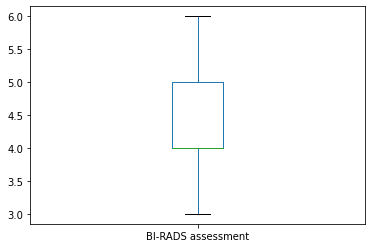

In [56]:
df['BI-RADS assessment'].plot(kind='box')

<AxesSubplot:>

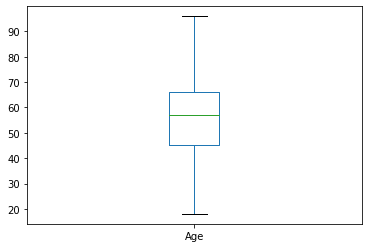

In [57]:
df['Age'].plot(kind='box') # age özelliğinde aykırı veri kontrolü

In [58]:
# Age özelliğinde aykırı veri yoktur

<AxesSubplot:>

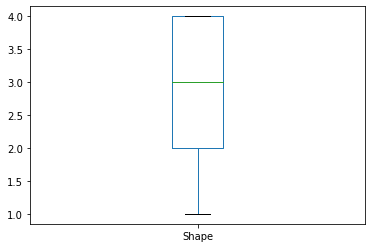

In [59]:
df['Shape'].plot(kind='box') # Shape özelliğinde aykırı veri kontrolü

<AxesSubplot:>

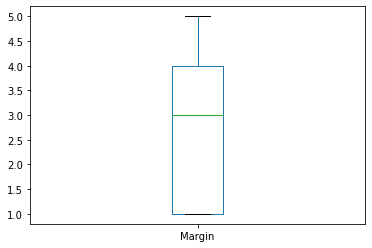

In [60]:
df['Margin'].plot(kind='box') # Margin özelliğinde aykırı veri kontrolü

In [61]:
# Margin özelliğinde aykırı veri yoktur

<AxesSubplot:>

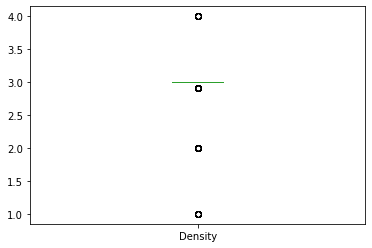

In [62]:
df['Density'].plot(kind='box') # Densitiy özelliğinde aykırı veri kontrolü

In [63]:
df

,Unnamed: 0,BI-RADS assessment,Age,Shape,Margin,Density,Severity
0,0,5.0,67.0,3.0,5.0,3.000000,1
1,1,4.0,43.0,1.0,1.0,2.910734,1
2,2,5.0,58.0,4.0,5.0,3.000000,1
3,3,4.0,28.0,1.0,1.0,3.000000,0
4,4,5.0,74.0,1.0,5.0,2.910734,1
...,...,...,...,...,...,...,...
956,956,4.0,47.0,2.0,1.0,3.000000,0
957,957,4.0,56.0,4.0,5.0,3.000000,1
958,958,4.0,64.0,4.0,5.0,3.000000,0
959,959,5.0,66.0,4.0,5.0,3.000000,1


In [64]:
#Verileri x(bağımsız nitelik) ve y(bağımlı nitelik) olarak ikiye ayırıyoruz

In [65]:
x=df.iloc[:,1:6].values

In [66]:
x

array([[ 5.        , 67.        ,  3.        ,  5.        ,  3.        ],
       [ 4.        , 43.        ,  1.        ,  1.        ,  2.91073446],
       [ 5.        , 58.        ,  4.        ,  5.        ,  3.        ],
       ...,
       [ 4.        , 64.        ,  4.        ,  5.        ,  3.        ],
       [ 5.        , 66.        ,  4.        ,  5.        ,  3.        ],
       [ 4.        , 62.        ,  3.        ,  3.        ,  3.        ]])

In [67]:
y=df.iloc[:,6:7].values

In [68]:
y

array([[1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
    

In [69]:
# Özellik Seçimi 

In [70]:
from matplotlib import pyplot as plt

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
feat_labels = ['BI-RADS assessment','Age','Shape','Margin','Density'] # Özelliklerin isimlerini bir değişkene atıyoruz

In [73]:
X_train,y_train,X_test,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [74]:
# Ağaç tabanlı özellik seçimi
#Kaynak:https://scikit-learn.org/stable/modules/feature_selection.html

In [75]:
 from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

 x.shape

clf = ExtraTreesClassifier(n_estimators=50)
 clf = clf.fit(x, y)
clf.feature_importances_  


<ipython-input-75-ff4a29c0a127>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf = clf.fit(x, y)


array([0.22386764, 0.30123908, 0.21402503, 0.21920706, 0.04166119])

<BarContainer object of 5 artists>

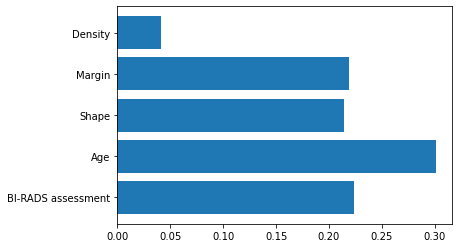

In [76]:
plt.barh(feat_labels, clf.feature_importances_)

In [77]:
# Densitiy özelliği en az önem değerine sahip özellik olarak bulunmuştur.
# Ben az sayıda özellik olduğu için bu özelliği çıkramadan modeli eğittim. Bu özellik çıkartılıp model tekrar eğitilerek
# sonuçlar karşılaştırılabilir

In [78]:
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt


In [79]:
#eğitim ve test kümelerinin ayarlanması

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [82]:
#Knn algoritması

In [83]:
from sklearn.neighbors import KNeighborsClassifier

In [84]:
knn_params = {"n_neighbors" : np.arange(1,50)}

In [85]:
knnModel=KNeighborsClassifier()

knn=GridSearchCV(knnModel,
                     knn_params,
                     cv=5,
                     n_jobs = -1,
                     return_train_score = "true")

In [86]:
knn.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             return_train_score='true')

In [87]:
knn_Results=knn.cv_results_

In [88]:
df_grid=pd.DataFrame(knn_Results)

In [89]:
df_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.016355,0.012843,0.016956,0.006212,1,{'n_neighbors': 1},0.748148,0.785185,0.776119,0.761194,...,0.775323,0.019876,17,0.960894,0.951583,0.959108,0.957249,0.959108,0.957588,0.003216
1,0.012368,0.008018,0.016755,0.003534,2,{'n_neighbors': 2},0.711111,0.755556,0.761194,0.753731,...,0.751542,0.021692,49,0.890130,0.882682,0.879182,0.860595,0.871747,0.876867,0.010061
2,0.012765,0.012808,0.013964,0.002602,3,{'n_neighbors': 3},0.762963,0.777778,0.776119,0.776119,...,0.776805,0.008902,15,0.878957,0.884544,0.875465,0.871747,0.877323,0.877607,0.004218
3,0.009973,0.009629,0.015757,0.003477,4,{'n_neighbors': 4},0.725926,0.770370,0.761194,0.761194,...,0.760453,0.019113,43,0.854749,0.854749,0.856877,0.842007,0.849442,0.851565,0.005373
4,0.011570,0.005225,0.012764,0.002220,5,{'n_neighbors': 5},0.770370,0.800000,0.783582,0.768657,...,0.781238,0.011308,4,0.841713,0.841713,0.862454,0.851301,0.860595,0.851555,0.008880
5,0.008577,0.005069,0.013364,0.002410,6,{'n_neighbors': 6},0.792593,0.792593,0.776119,0.753731,...,0.776739,0.014817,16,0.841713,0.834264,0.860595,0.838290,0.834572,0.841887,0.009742
6,0.006384,0.002569,0.013962,0.002443,7,{'n_neighbors': 7},0.770370,0.800000,0.768657,0.776119,...,0.779746,0.011393,10,0.849162,0.845438,0.842007,0.838290,0.830855,0.841150,0.006285
7,0.003989,0.001669,0.013364,0.002409,8,{'n_neighbors': 8},0.770370,0.792593,0.798507,0.761194,...,0.779757,0.013873,9,0.834264,0.843575,0.843866,0.832714,0.830855,0.837055,0.005549
8,0.008776,0.002393,0.019148,0.009533,9,{'n_neighbors': 9},0.770370,0.792593,0.783582,0.798507,...,0.787219,0.009675,1,0.843575,0.821229,0.842007,0.840149,0.825279,0.834448,0.009293
9,0.006185,0.001935,0.015159,0.002555,10,{'n_neighbors': 10},0.755556,0.785185,0.805970,0.776119,...,0.782775,0.016718,3,0.823091,0.826816,0.828996,0.827138,0.821561,0.825520,0.002755


In [90]:
print("En iyi skor:" + str(knn.best_score_))
print("En iyi parametreler: " + str(knn.best_params_))

En iyi skor:0.7872194582642343
En iyi parametreler: {'n_neighbors': 9}


In [91]:
knn_best_model=knn.best_estimator_

In [92]:
knn_crossVal=knn.best_score_

In [93]:
knn_best_model.fit(X_train, y_train)

<ipython-input-93-aa475cdc438e>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn_best_model.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=9)

In [94]:
knn_best_model.score(X_test, y_test)

0.7993079584775087

In [95]:
# Knn algoritmasını eğitim kümemize uyguladığımızda doğruluk değeri=0.7946379215035931 iken
# test kümemizde 0.7958477508650519 bulunmuştur.Sonuçlar birbirine çok yakın bulunmuştur

In [96]:
  y_pred_knn = knn_best_model.predict(X_test)
  y_pred_knn

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1], dtype=int64)

In [97]:
# DecisionTreeClassifier algoritması

In [98]:
X_train, X_test, y_train, y_test=train_test_split(x,y,stratify=y,test_size=0.3,random_state=0)

In [99]:
from sklearn.tree import DecisionTreeClassifier

In [100]:
dtc_params = {"max_depth" : np.arange(1,7)}

In [101]:
tree=DecisionTreeClassifier()

dtc=GridSearchCV(tree,
                     dtc_params,
                     cv=5,
                     n_jobs = -1,
                     return_train_score = "true")

In [102]:
dtc.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': array([1, 2, 3, 4, 5, 6])},
             return_train_score='true')

In [103]:
dtc_allResults=dtc.cv_results_

In [104]:
df_grid=pd.DataFrame(dtc_allResults)

In [105]:
df_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004787,6.597153e-03,0.000200,0.000399,1,{'max_depth': 1},0.814815,0.844444,0.820896,0.738806,...,0.809464,0.036695,2,0.808194,0.800745,0.806691,0.827138,0.804833,0.809520,0.009155
1,0.000997,9.655217e-07,0.000199,0.000399,2,{'max_depth': 2},0.814815,0.837037,0.813433,0.783582,...,0.815445,0.018181,1,0.808194,0.819367,0.825279,0.832714,0.804833,0.818077,0.010401
2,0.001197,3.991396e-04,0.000997,0.000002,3,{'max_depth': 3},0.822222,0.837037,0.820896,0.731343,...,0.807971,0.038736,3,0.832402,0.834264,0.832714,0.845725,0.830855,0.835192,0.005377
3,0.001396,7.975112e-04,0.001796,0.001597,4,{'max_depth': 4},0.814815,0.814815,0.813433,0.768657,...,0.805030,0.018197,4,0.837989,0.837989,0.845725,0.869888,0.836431,0.845604,0.012569
4,0.001197,3.969458e-04,0.000399,0.000489,5,{'max_depth': 5},0.792593,0.844444,0.813433,0.753731,...,0.803527,0.029899,5,0.849162,0.851024,0.864312,0.875465,0.849442,0.857881,0.010438
5,0.001397,4.894342e-04,0.000620,0.000508,6,{'max_depth': 6},0.770370,0.822222,0.813433,0.761194,...,0.794638,0.024290,6,0.864060,0.864060,0.881041,0.897770,0.858736,0.873133,0.014432


In [106]:
print("En iyi skor:" + str(dtc.best_score_))
print("En iyi parametreler: " + str(dtc.best_params_))

En iyi skor:0.8154449972360421
En iyi parametreler: {'max_depth': 2}


In [107]:
dtc_best_model=dtc.best_estimator_

In [108]:
dtc_crossVal=dtc.best_score_

In [109]:
dtc_best_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [110]:
dtc_best_model.score(X_test, y_test)

0.8512110726643599

In [111]:
# DecisionTree algoritmasını eğitim kümemize uyguladığımızda doğruluk değeri=0.8154449972360421 iken
# test kümemizde 0.8512110726643599 bulunmuştur. Test kümesinde daha iyi sonuç bulunmuştur. 
# Bu durum modelimizin başarılı olduğunu göstermektedir.

In [112]:
#Naive Bayes Algoritması

In [113]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [114]:
from sklearn.naive_bayes import GaussianNB

In [115]:
nb = GaussianNB()

In [116]:
nb.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GaussianNB()

In [117]:
nb.score(X_train, y_train)

0.8184523809523809

In [118]:
nb.score(X_test, y_test)

0.8546712802768166

In [119]:
# NaiveBayes algoritması eğitim kümesine uygulandığında doğruluk değeri 0.8065476190476191 çıkarken 
# test kümesinde 0.7993079584775087 bulunmuştur. Değerler çok yakın olmakla beraber test kümesinde 
# doğruluk değerinin düştüğü görülmektedir.

In [120]:
# En iyi Sonuçlar

In [121]:
modeller = [
    knn_best_model,
    dtc_best_model,
    nb
]

In [122]:
from sklearn.metrics import plot_confusion_matrix

KNeighborsClassifier:
Accuracy: 79.9308%


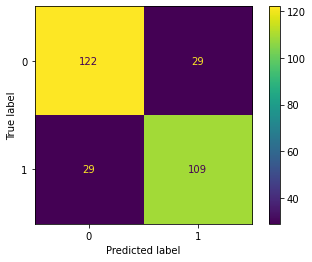

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       151
           1       0.79      0.79      0.79       138

    accuracy                           0.80       289
   macro avg       0.80      0.80      0.80       289
weighted avg       0.80      0.80      0.80       289

DecisionTreeClassifier:
Accuracy: 83.7370%


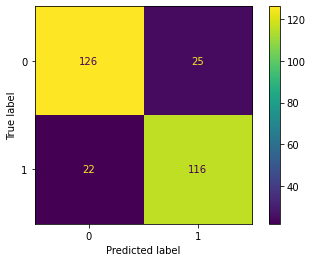

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       151
           1       0.82      0.84      0.83       138

    accuracy                           0.84       289
   macro avg       0.84      0.84      0.84       289
weighted avg       0.84      0.84      0.84       289

GaussianNB:
Accuracy: 85.4671%


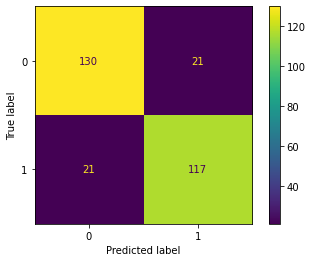

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       151
           1       0.85      0.85      0.85       138

    accuracy                           0.85       289
   macro avg       0.85      0.85      0.85       289
weighted avg       0.85      0.85      0.85       289



In [123]:
for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)
    print(isimler + ":" )
    print("Accuracy: {:.4%}".format(dogruluk))
    plot_confusion_matrix(model,X_test,y_test)
    plt.show()
    print(classification_report(y_test,y_pred))

In [124]:
#Sonuçlar

In [125]:
#KNN: 79.5848%
#DecisionTree: 83.7370%
#NaiveBayes:79.9308%
# En iyi sonuç Decision Tree de bulunmuştur

In [ ]:
# Bir çok Test Oluşturulması

In [126]:
seeds=np.arange(10**2)

In [127]:
np.random.shuffle(seeds)

In [128]:
seeds=seeds[:30]
seeds

array([84,  5,  0, 26,  2, 60, 71, 13, 48,  3, 96, 50, 69, 44, 47, 33, 18,
       39, 40, 46, 53, 25, 20, 64, 91, 77, 15, 82, 65, 29])

In [135]:
dogruluk_knn=[]
dogruluk_dtc=[]
dogruluk_nb=[]

In [136]:
for i in seeds:
    X_train,X_test,y_train,y_tets=train_test_split(x,y,
                                                  test_size=0.30,
                                                  random_state=i,
                                                  stratify=y)
    knn_best_model.fit(X_train,y_train)
    knn_i_acc=knn_best_model.score(X_test,y_test)
    dogruluk_knn.append(knn_i_acc)
    
    
    dtc_best_model.fit(X_train,y_train)
    dtc_i_acc=dtc_best_model.score(X_test,y_test)
    dogruluk_dtc.append(dtc_i_acc)
    
    nb.fit(X_train,y_train)
    nb_acc=nb.score(X_test,y_test)
    dogruluk_nb.append(nb_acc)

<ipython-input-136-02b93493c627>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn_best_model.fit(X_train,y_train)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
<ipython-input-136-02b93493c627>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn_best_model.fit(X_train,y_train)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
<ipython-input-136-02b93493c627>:6: 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
<ipython-input-136-02b93493c627>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn_best_model.fit(X_train,y_train)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
<ipython-input-136-02b93493c627>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn_best_model.fit(X_train,y_train)
C:\ProgramData\Anaconda3\lib\site-pa

In [139]:
d = {'knn_dogruluk': dogruluk_knn, 'dtc_dogruluk': dogruluk_dtc,'nb_dogruluk': dogruluk_nb}
df_List = pd.DataFrame(data=d)

In [140]:
df_List

,knn_dogruluk,dtc_dogruluk,nb_dogruluk
0,0.470588,0.487889,0.491349
1,0.456747,0.453287,0.474048
2,0.477509,0.477509,0.484429
3,0.505190,0.512111,0.498270
4,0.512111,0.512111,0.505190
5,0.553633,0.501730,0.522491
6,0.539792,0.546713,0.550173
7,0.519031,0.529412,0.501730
8,0.550173,0.546713,0.532872
9,0.501730,0.470588,0.474048
